# **분류**

- 데이터가 어느 범주(category)에 해당하는지 판단. 

- 유사한 것들을 같은 범주로 묶으면 주변에서 일어나는 일을 빠르게 판단하는데 도움. 

- 알고리즘의 퍼포먼스 측정방법 비교:

    - 회귀: SSE(잔차 제곱의 합, Sum of Squared Error) --실수, 
             MSE(잔차 제곱의 평균, Mean of Squared Error) --실수
          
    - 분류: 정확도(예측이 정답을 얼마나 맞혔는지) --%
    
- 분류문제에는 명확한 답이 없는 경우도 있다. --비지도학습(Unsupervised Learning)

## **5.1 이항분류**

- 이항분류(Binary Classification): 정답의 범주가 2개.

In [1]:
#색깔 정보없이 숫자만 보고 레드/화이트 구분하기

# 5.1 와인 데이터셋 불러오기
import tensorflow as tf
import pandas as pd
from IPython.display import display

red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

display(red.head())
display(white.head())


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [2]:
'''
import sklearn
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import tensorflow as tf

from IPython.display import display

wine = datasets.load_wine()
print(wine['DESCR'])
'''
# 12개의 속성으로 와인의 종류를 분류해야 한다.
# 텐서플로에서 이 데이터를 사용하려면 두 데이터프레임을 하나로 합쳐야 함

"\nimport sklearn\nfrom sklearn import datasets\nimport matplotlib.pyplot as plt\nimport seaborn as sns\nimport pandas as pd\nimport numpy as np\nimport tensorflow as tf\n\nfrom IPython.display import display\n\nwine = datasets.load_wine()\nprint(wine['DESCR'])\n"

In [3]:
# 5.2 와인데이터셋 합치기
# 레드와인인지 화이트와인인지 표시해주는 속성 추가 후 합치기

# 속성(column) 추가하기: red는 0, white는 1
red['type'] = 0
white['type'] = 1

# 합치기
wine = pd.concat([red, white])
display(wine.describe())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [4]:
# .describe() 결과 분석: 
# 평균(mean) 값이 0.75 ==> 0(red)보다 1(white)이 많다. <-가설

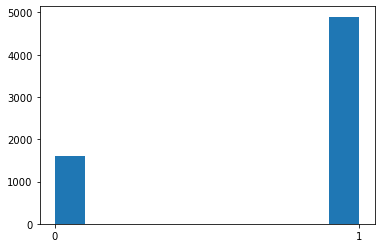

1    4898
0    1599
Name: type, dtype: int64


In [5]:
# 5.3 레드 와인과 화이트 와인에 대한 type 히스토그램 그리기
# for: 'red보다 white가 많다'는 가설 검증

import matplotlib.pyplot as plt

plt.hist(wine['type'])
plt.xticks([0, 1])
plt.show()

print(wine['type'].value_counts())

In [6]:
# 그래프분석:
# 가설대로 red보다 white가 많음을 알 수 있다. 
# 정확한 수치를 알기위해: .value_counts()
#    --> 딥러닝 학습을 위해 훈련데이터와 테스트데이터로 나눠야되는데,
#        red와 white가 비슷한 '비율'로 들어가도록 랜덤하게 섞어야 함
#        red와 white의 정확한 수치를 알고 있으므로 어떤 '비율'로 섞을지 알 수 있음.

# 딥러닝 학습 전 해야할 일:
# 1. 데이터 전처리: 정규화
# 2. 훈련/테스트 데이터 나누기 위한 비율 계산

In [7]:
# 5.4 데이터 요약 정보 확인하기
# 외부에서 불러오는 데이터는 어떤 값으로 구성되어있는지 알기 어려움. 
#   --> 판다스 데이터파악하기: .info()
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB
None


In [8]:
# 내용분석: 
# 정규화할 때 데이터에 숫자가 아닌 다른 값이 들어가면 에러.
# 현재 wine은 (1) null값이 없고, (2) 모두 숫자이므로 정규화 可

In [9]:
# 5.5 데이터 정규화하기
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())

'''
<표준화 vs 정규화>

1. 표준화(Standardization):
데이터가 평균을 기준으로 어느정도 떨어져있는지를 나타냄. 
Xnew = (X - 평균) / 표준편차

2. 정규화(Normalization):
데이터의 분포를 0~1로 조정.
Xnew = (X - 최솟값) / (최댓값 - 최솟값)
'''

display(wine_norm.head())
display(wine_norm.tail())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333,0.0
1,0.330579,0.533333,0.000000,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,0.333333,0.0
2,0.330579,0.453333,0.024096,0.026074,0.137874,0.048611,0.110599,0.190669,0.418605,0.241573,0.260870,0.333333,0.0
3,0.611570,0.133333,0.337349,0.019939,0.109635,0.055556,0.124424,0.209948,0.341085,0.202247,0.260870,0.500000,0.0
4,0.297521,0.413333,0.000000,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333,0.0


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
4893,0.198347,0.086667,0.174699,0.015337,0.049834,0.079861,0.198157,0.077694,0.426357,0.157303,0.463768,0.500000,1.0
4894,0.231405,0.160000,0.216867,0.113497,0.063123,0.194444,0.373272,0.150183,0.333333,0.134831,0.231884,0.333333,1.0
4895,0.223140,0.106667,0.114458,0.009202,0.053156,0.100694,0.241935,0.104685,0.209302,0.134831,0.202899,0.500000,1.0
4896,0.140496,0.140000,0.180723,0.007669,0.021595,0.065972,0.239631,0.030461,0.480620,0.089888,0.695652,0.666667,1.0
4897,0.181818,0.086667,0.228916,0.003067,0.018272,0.072917,0.211982,0.044342,0.418605,0.056180,0.550725,0.500000,1.0


In [10]:
# 5.6 데이터를 섞은 후 넘파이 array로 변환하기
import numpy as np

wine_shuffle = wine_norm.sample(frac=1)
#.sample(frac= ):
#전체 df에서 frac인수로 지정된 비율의 행을 랜덤하게 뽑아서 새로운 df.
#frac=1 --> 100%를 뽑아서 섞는다.
display(wine_shuffle.head())

wine_np = wine_shuffle.to_numpy()
#.to_numpy():
#df -> np
display(wine_np[:5])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
703,0.305785,0.200000,0.289157,0.030675,0.106312,0.072917,0.179724,0.194525,0.465116,0.269663,0.231884,0.166667,0.0
485,0.198347,0.066667,0.228916,0.013804,0.031561,0.121528,0.255760,0.113553,0.581395,0.179775,0.246377,0.500000,1.0
630,0.404959,0.306667,0.156627,0.029141,0.146179,0.020833,0.057604,0.202236,0.426357,0.213483,0.188406,0.500000,0.0
1866,0.314050,0.126667,0.150602,0.203988,0.068106,0.152778,0.444700,0.217660,0.480620,0.157303,0.260870,0.500000,1.0
588,0.099174,0.226667,0.144578,0.021472,0.084718,0.062500,0.101382,0.088490,0.775194,0.292135,0.869565,0.833333,0.0


array([[0.30578512, 0.2       , 0.28915663, 0.03067485, 0.10631229,
        0.07291667, 0.1797235 , 0.19452477, 0.46511628, 0.26966292,
        0.23188406, 0.16666667, 0.        ],
       [0.19834711, 0.06666667, 0.22891566, 0.01380368, 0.03156146,
        0.12152778, 0.25576037, 0.11355311, 0.58139535, 0.17977528,
        0.24637681, 0.5       , 1.        ],
       [0.40495868, 0.30666667, 0.15662651, 0.0291411 , 0.1461794 ,
        0.02083333, 0.05760369, 0.20223636, 0.42635659, 0.21348315,
        0.1884058 , 0.5       , 0.        ],
       [0.31404959, 0.12666667, 0.15060241, 0.20398773, 0.06810631,
        0.15277778, 0.44470046, 0.21765953, 0.48062016, 0.15730337,
        0.26086957, 0.5       , 1.        ],
       [0.09917355, 0.22666667, 0.14457831, 0.02147239, 0.08471761,
        0.0625    , 0.10138249, 0.08849046, 0.7751938 , 0.29213483,
        0.86956522, 0.83333333, 0.        ]])

In [11]:
# 5.7 훈련데이터와 테스트데이터 분리하기
# 검증데이터: 케라스-훈련데이터에서 일부를 떼서 자동으로 생성
# 추가) 학습을 위해 각 데이터를 X(입력), Y(출력)으로 분리하기 
import tensorflow as tf

#훈련데이터/테스트데이터 분리하기
train_idx = int(len(wine_np) * 0.8)
#80%에 해당하는 데이터를 뗄 계획.
#int값으로 index저장

# +훈련/테스트 로 분리할 뿐만 아니라, X를 입력했을 때 Y로 출력되어야 하므로
# '12개의 기존속성에 대한 정보'를 X로, '새롭게 추가했던 속성(type)'을 Y로 둔다.
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]

print(train_X[0])
print(train_Y[0])    # 0.0
print(test_X[0])
print(test_Y[0])

train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=2)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=2)
# .to_categorical():
# 분류문제에서 자주 쓰이는 함수. 정답행렬을 원핫인코딩(One-Hot Encoding)으로 바꿈. 
# cf. One-Hot Encoding: 정답인덱스는 1, 나머지인덱스에는 0
#    --> 현 예제에서는 정답클래스가 red, white 두 종류이므로 num_classes가 2. 

print(train_Y[0])  # .to_categorical 전에는 0.0으로 출력됐지만 지금은 [1. 0.]으로 출력.
print(test_Y[0])

[0.30578512 0.2        0.28915663 0.03067485 0.10631229 0.07291667
 0.1797235  0.19452477 0.46511628 0.26966292 0.23188406 0.16666667]
0.0
[0.16528926 0.15333333 0.19277108 0.05981595 0.02491694 0.09375
 0.20276498 0.03759398 0.41085271 0.16853933 0.82608696 0.66666667]
1.0
[1. 0.]
[0. 1.]


In [12]:
# 5.8 와인 데이터셋 분류 모델 생성하기
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=2, activation='softmax')   # [주의] 1)분류모델의 마지막 활성화함수: softmax, 2)unit 수: 2
])
# <활성화함수 softmax>
# max함수와 비슷. 큰 갑을 강조하고 작은 값은 약화 --지수함수의 특징!
# 결괏값들은 총합이 1인 "확률값"
# 분류문제, 언어RNN - 다음 토큰 예측, 강화학습 - 에이전트의 행동확률 등 "결괏값으로 확률이 필요한 경우"
# <unit 수>
# One-Hot Encoding으로 변환한 정답의 차원수와 동일하도록 설정. 

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.7),
             loss='categorical_crossentropy',
             metrics=['accuracy'] #분류 문제는 정확도로 퍼포먼스를 측정하므로 '정확도설정 필수'!  --> 모델 학습 히스토리에 loss와 accuracy 함께 저장
             )

model.summary()

'''
<엔트로피(entropy)와 정보이론>
- 엔트로피: 
    - 정보량을 나타내기 위한 단위. 불확실한 정보를 숫자로 정량화하는 도구. 
    - 확률의 역수에 로그를 취한 값. (확률의 역수를 취해주는 이유: 확률이 높은 사건일수록 정보 적음)
    - 엔트로피의 기댓값: 각 엔트로피에 확률을 곱한 값. -> ≒ 손실
    - 엔트로피가 더 높은 사건 == 더 가치있는 '정보획득'이 필요, 불확실한 사건.
    - 엔트로피를 줄이도록 예측값조정: == 불확실성이 낮아진다. 
- 크로스엔트로피(crossentropy):
    - CCE: 분류네트워크가 예측한 라벨의 확률의 역수에 로그를 취한 값과 정답확률의 평균 
    - 평균을 구해주는 이유: 분류네트워크가 예측한 라벨의 확률과 정답확률 모두 범주가 2개 이상
    - 정답라벨은 반드시 1.0, 오답라벨은 0.0  ==> 오답라벨에 곱해지는 값은 버려진다. 
'''

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                624       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 26        
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


"\n<엔트로피(entropy)와 정보이론>\n- 엔트로피: \n    - 정보량을 나타내기 위한 단위. 불확실한 정보를 숫자로 정량화하는 도구. \n    - 확률의 역수에 로그를 취한 값. (확률의 역수를 취해주는 이유: 확률이 높은 사건일수록 정보 적음)\n    - 엔트로피의 기댓값: 각 엔트로피에 확률을 곱한 값. -> ≒ 손실\n    - 엔트로피가 더 높은 사건 == 더 가치있는 '정보획득'이 필요, 불확실한 사건.\n    - 엔트로피를 줄이도록 예측값조정: == 불확실성이 낮아진다. \n- 크로스엔트로피(crossentropy):\n    - CCE: 분류네트워크가 예측한 라벨의 확률의 역수에 로그를 취한 값과 정답확률의 평균 \n    - 평균을 구해주는 이유: 분류네트워크가 예측한 라벨의 확률과 정답확률 모두 범주가 2개 이상\n    - 정답라벨은 반드시 1.0, 오답라벨은 0.0  ==> 오답라벨에 곱해지는 값은 버려진다. \n"

In [13]:
# 5.9 와인 데이터셋에 대한 분류 모델 학습하기 
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Train on 3897 samples, validate on 1300 samples
Epoch 1/25
3897/3897 [==============================] - 1s 183us/sample - loss: 6.0916 - accuracy: 0.7313 - val_loss: 0.5857 - val_accuracy: 0.7538
Epoch 2/25
3897/3897 [==============================] - 0s 43us/sample - loss: 0.5870 - accuracy: 0.7555 - val_loss: 0.6234 - val_accuracy: 0.7538
Epoch 3/25
3897/3897 [==============================] - 0s 41us/sample - loss: 0.5782 - accuracy: 0.7555 - val_loss: 0.5804 - val_accuracy: 0.7538
Epoch 4/25
3897/3897 [==============================] - 0s 42us/sample - loss: 0.5778 - accuracy: 0.7555 - val_loss: 0.5899 - val_accuracy: 0.7538
Epoch 5/25
3897/3897 [==============================] - 0s 41us/sample - loss: 0.5735 - accuracy: 0.7555 - val_loss: 0.5978 - val_accuracy: 0.7538
Epoch 6/25
3897/3897 [==============================] - 0s 43us/sample - loss: 0.5887 - accuracy: 0.7483 - val_loss: 0.6007 - val_accuracy: 0.7538
Epoch 7/25
3897/3897 [==============================] - 0s 48us/sampl

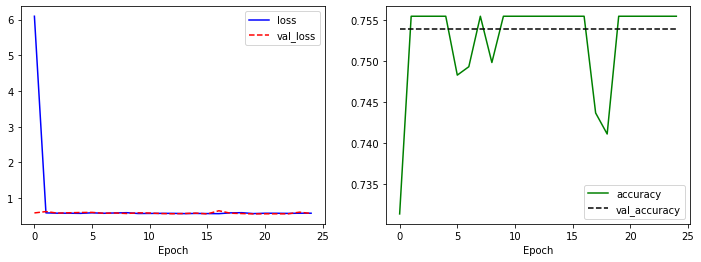

In [14]:
# 5.10 분류 모델의 학습 결과 시각화하기
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)   # 1x2 그리드로 나눈 후 1번째 plot
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()

In [15]:
# 5.11 분류 모델 평가하기: test데이터 사용
model.evaluate(test_X, test_Y)

1300/1300 [==============================] - 0s 25us/sample - loss: 0.5716 - accuracy: 0.7515


[0.5716339034300584, 0.75153846]

## **5.2 다항분류**

- 와인데이터셋에서 와인의 품질은 0~10까지의 숫자로 구분 ---> 다항분류의 범주로 사용: 와인의 품질 예측하기

In [16]:
# 5.12 품질 데이터 확인하기
print(wine['quality'].describe())
print(wine['quality'].value_counts())

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64


In [17]:
# 분석하기: 
# 1. 최솟값 3, 최댓값 9
# 2. 각 항목의 갯수가 균일하지 않음 -->시각화로 조금 더 자세하게 확인 必

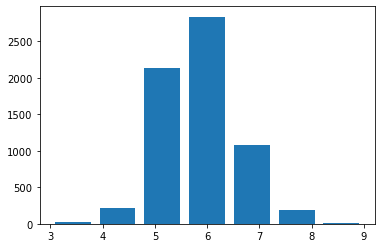

In [18]:
# 5.13 품질 히스토그램 시각화하기
plt.hist(wine['quality'], bins = 7, rwidth = 0.8)
plt.show()

In [19]:
# 그래프 분석하기:
# 1. 데이터의 양이 적다. 
# 2. 범주의 수가 많다.
# 3. 범주 간 해당 데이터 수 차이가 많이 난다. --모든 범주에 대한 세세한 분류 어렵다. 
# --> 데이터범주 재분류하기: 3~5 나쁨, 6 보통, 7~9 좋음

In [20]:
# 5.14 품질을 3개의 범주로 재분류하기
wine.loc[wine['quality'] <= 5, 'new_quality'] = 0
wine.loc[wine['quality'] == 6, 'new_quality'] = 1
wine.loc[wine['quality'] >= 7, 'new_quality'] = 2
# .loc[]: 특정데이터의 인덱스 골라내기 
# .loc[x] --하나의 인수: 행 골라내기
# .loc[x, y]  --두개의 인수: 행, 열 골라내기

print(wine['new_quality'].describe())
print(wine['new_quality'].value_counts())

count    6497.000000
mean        0.829614
std         0.731124
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: new_quality, dtype: float64
1.0    2836
0.0    2384
2.0    1277
Name: new_quality, dtype: int64


In [21]:
# 재분류 하기 전에는 범주간 데이터 수 차이가 많이 났지만 
# 재분류하니까 어느정도 비슷해졌다! 

In [22]:
# 5.15 데이터 정규화 및 데이터split
del wine['quality']
# new_quality가 있기 때문에 기존의 'quality'는 삭제

# 정규화하기
wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
# 데이터 섞은 후 넘파이array로 변환하기
wine_shuffle = wine_norm.sample(frac = 1)
wine_np = wine_shuffle.to_numpy()

# 데이터 split
train_idx = int(len(wine_np) * 0.8)
# '품질예측'이 목표이므로 Y값은 품질(제일 마지막 컬럼), X값은 품질을 제외한 나머지 속성
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx, -1]
# 정답(Y)행렬을 원-핫-인코딩으로 바꾸기: 품질에 대한 답이 3종류이므로 num_classes=3
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=3)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=3)

In [24]:
# 5.16 와인 데이터세트 다항 분류 모델 생성하기 & 학습하기

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=48, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=12, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

hisotry = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)

Train on 3897 samples, validate on 1300 samples
Epoch 1/25
3897/3897 [==============================] - 1s 153us/sample - loss: 0.4762 - accuracy: 0.8055 - val_loss: 0.4604 - val_accuracy: 0.8031
Epoch 2/25
3897/3897 [==============================] - 0s 44us/sample - loss: 0.4207 - accuracy: 0.8073 - val_loss: 0.4164 - val_accuracy: 0.8031
Epoch 3/25
3897/3897 [==============================] - 0s 44us/sample - loss: 0.4381 - accuracy: 0.7980 - val_loss: 0.4220 - val_accuracy: 0.8031
Epoch 4/25
3897/3897 [==============================] - 0s 44us/sample - loss: 0.4109 - accuracy: 0.8047 - val_loss: 0.4207 - val_accuracy: 0.8223
Epoch 5/25
3897/3897 [==============================] - 0s 44us/sample - loss: 0.4145 - accuracy: 0.8127 - val_loss: 0.4311 - val_accuracy: 0.8031
Epoch 6/25
3897/3897 [==============================] - 0s 45us/sample - loss: 0.4214 - accuracy: 0.8040 - val_loss: 0.4182 - val_accuracy: 0.8031
Epoch 7/25
3897/3897 [==============================] - 0s 46us/sampl

In [25]:
# 검증데이터에 대해 약 80프로 정도의 분류성적. 

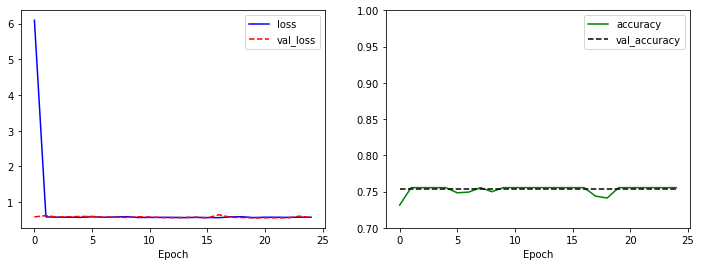

In [27]:
# 5.17 다항분류모델 학습결과 시각화하기

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel("Epoch")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel("Epoch")
plt.ylim(0.7, 1)
plt.legend()

plt.show()

In [28]:
# 그래프분석:

In [29]:
# 5.18 다항분류모델 평가하기
model.evaluate(test_X, test_Y)

ValueError: Input arrays should have the same number of samples as target arrays. Found 1300 input samples and 3 target samples.

In [30]:
# 결과가 마음에 들지 않는다면:
# 네트워크 크기를 키우거나 학습률 조정

## 5.3 다항분류 두번째 실습: FashionMNIST

